## 도형그리기
- 각 함수들은 원본 이미지에 도형을 그린다.
- **cv2.line(img, pt1, pt2, color, tickness=None, lineType=None, shift):img**
    - 선그리기
    - 매개변수
        - img: 그릴 대상 이미지
        - pt1, pt2: 직선의 시작/끝점. 각각 튜플(x, y)
        - color: 선색 또는 밝기 (B,G,R) 튜플 또는 정수
        - thickness: 선 두께. 기본값=1 (픽셀)
        - lineType: 선 타입. cv2.LINE_4, cv2.LINE_8(기본값), cv2.LINE_AA(부드러운 형태) 중 선택. 일직선이 아니면 LINE_AA를 준다.
    - 반환값
       - 선을 그린 image (ndarray) 반환 (모든 도형함수 동일)

- **cv2.rectangle(img, pt1, pt2, color, thickness=None, lineType=None):img**
- **cv2.rectangle(img, rec, color, thickness=None, lineType=None):img**
    - 사각형 그리기
    - 매개변수
        - pt1, pt2: 좌측상단, 우측하단 좌표. 튜플 (x, y)
        - rec: 사각형의 위치정보(x, y, w, h) 튜플지정.
        - thickness: 도형에서는 -1을 주면 내부를 채운다. 


- **cv2.circle(img, center, radius, color, thickness=None, lineStyle=None): img**
    - 원 그리기. 원의 lineType은 LINE_AA (안티 알리애싱)을 주면 부드럽게 그려진다. 
    - 매개변수
        - center: 원의 중심좌표. 튜플 (x,y)
        - radius: 반지름

- **cv2.polylines(img, pts, isClosed, color, thinkness=None, lineType=None): img**
    - 다각형을 그린다.
    - 매개변수
        - pts: 다각형의 외곽점들의 좌표배열. ndarray 리스트 (ex: \[np.array[[10,10],[50,50], [10,10]])\] => 리스트로 감싸서 넣는다.
        - isClosed: bool. 폐곡선 여부. 시작점과 끝점을 연결할지 여부.

- **cv2.putText(img, text, org, fontFace, fontScale, color, thickness=None, lineType=None): img**
    - 문자열을 출력. 영문/숫자만 지원(한글 지원안함.)
    - 매개변수
        - text: 출력할 문자열
        - org: 이미지에서 문자열을 출력할 위치. 좌측 하단의 좌표를 튜플로 지정 (x,y)
        - fontFace: 폰트 종류. cv2.FONT_HERSHEY_ 로 시작하는 상수 중 선택
        - fontScale: 폰트 크기 확대/축소 비율. 1이 기본. 1을 기준으로 정한다.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [9]:
img = np.full((400, 400, 3), fill_value=255, dtype="uint8")
# (대상이미지, 도형을그리기위해필요한정보, 공통정보-색, 두께, type)
### 직선 -> 양단 끝점의 좌표(x,y)
cv2.line(img, (50, 50), (200, 50), color=(0, 0, 255), thickness=1) # color=(B, G, R)
cv2.line(img, (50, 50), (200, 200), color=(255, 0, 0), thickness=3, lineType=cv2.LINE_AA)

### 사각형 - 1. (좌상단 좌표), (우하단 좌표) -----난 이 방식이 더 좋은 거 같다잉.
cv2.rectangle(img, (70, 200), (180, 280), color=(0, 255, 0), thickness=1)
### 사각형 - 2. (좌상단 좌표, width, height)
cv2.rectangle(img, (100, 210, 50, 60), (128, 128, 128), -1) # thickness=-1 : 색을 채운다.

### 원 - (중앙좌표), 반지름, 색깔
cv2.circle(img, (300, 100), 30, (128, 0, 100), 1)
cv2.circle(img, (300, 200), 30, (128, 0, 100), 1, lineType=cv2.LINE_AA)

### 다각형 - 연결점의 좌표, 폐곡선여부(isClosed) - 시작/끝점을 연결할지 여부
pts = np.array([[250, 200], [300, 200], [350, 300], [250, 300]])
cv2.polylines(img, [pts], False, # isClosed
              color=(200, 200, 50), thickness=1, lineType=cv2.LINE_AA)

# Text: 출력할 text, (글을쓰기시작할위치의좌표), font, 글씨크기
txt = "Hello World"
cv2.putText(img, txt, (50, 350), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 1, cv2.LINE_AA)
           

cv2.imshow("frame", img)
cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
#### 이미지에 한글 쓰기 -> opencv 는 지원안함.
##### PIL를 이용해서 한글을 쓴다.

In [11]:
!pip install pillow
# PIL (Python Image Lib)

In [14]:
# 폰트파일 경로 찾기
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontext='ttf')
print("폰트개수:", len(font_list))
print(font_list[:3])
malgun = [font_path for font_path in font_list if 'malgun' in font_path.lower()] #이 식, 빼먹지 말고 잘 활용하자!
malgun

폰트개수: 752
['C:\\WINDOWS\\Fonts\\GOTHICB.TTF', 'C:\\Windows\\Fonts\\palai.ttf', 'C:\\WINDOWS\\Fonts\\HTOWERT.TTF']


['C:\\Windows\\Fonts\\malgun.ttf',
 'C:\\Windows\\Fonts\\malgunbd.ttf',
 'C:\\Windows\\Fonts\\malgunsl.ttf',
 'C:\\WINDOWS\\Fonts\\malgunsl.ttf',
 'C:\\WINDOWS\\Fonts\\malgun.ttf',
 'C:\\WINDOWS\\Fonts\\malgunbd.ttf']

In [15]:
### PILLOW 를 이용해서 이미지에 한글을 작성
import numpy as np
from PIL import Image, ImageFont, ImageDraw
import cv2

# 폰트설정(폰트객체 생성)
font_path = r'C:\\Windows\\Fonts\\malgun.ttf'
font = ImageFont.truetype(font_path, 20) # 폰트파일경로, 폰트크기

img = np.full((400,400,3), fill_value=200, dtype="uint8")
# ndarray -> PIL의 Image객체로 변환.
img_pil = Image.fromarray(img) # array로 부터 Image를 생성. (PIL: RGB)
# ImageDraw 객체 생성 -> ImageDraw: Image에 도형을 그리는 메소드들을 제공.
draw = ImageDraw.Draw(img_pil) # image_pil에 도형을 그릴수 있는 Draw객체 생성.
# Text를 쓰기
draw.text((50, 50), # 글을 쓰기 시작할 좌표(x,y)
          "안녕하세요", 
          fill=(0, 0, 255), # 색: (R, G, B)
          font=font
         )
# type(img_pil)
### PIL 이미지를 ndarray로 변환
img = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)
cv2.imshow('frame', img)
cv2.waitKey()
cv2.destroyAllWindows()

# TODO
- lenna 이미지를 읽은 뒤 적당한 위치에 txt(이름)를 쓴다.
- 얼굴에 Bounding Box(사각형)를 그리기.

In [18]:
import cv2
import matplotlib.pyplot as plt

txt='Lenna Forsen' 
lenna = cv2.imread("images/Lenna.png")

## 이름 출력(text) - putText
cv2.putText(lenna, txt, (180, 430), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 250), 2, cv2.LINE_AA)
## 얼굴에 Box (Bounding Box) - rectangle
cv2.rectangle(lenna, (380, 200), (200, 380), (255, 255, 250), 2)


cv2.imshow("frame", lenna)
cv2.waitKey()
cv2.destroyAllWindows()

## 이미지 Crop
- open cv는 이미지를 numpy의 ndarray를 이용해 연산하기 때문에 image의 특정 영역의 좌표만 알면 그 영역을 잘라낼 수 있다.

In [20]:
### 이미지 crop: 특정 위치를 짤라내기.
lenna_face = lenna[200:381, 200:381].copy()
lenna_face.shape
cv2.imshow("frame", lenna_face)
cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
a = np.array([1, 2])  # x, y
b = np.array([[1, 2], [3, 4]])
b
# (1,2) @ (2, 2) = 1, 2
a @ b

array([ 7, 10])

In [22]:
b

array([[1, 2],
       [3, 4]])

In [21]:
c = np.array([1,1])
c @ b

array([4, 6])

## 영상의 기하학적 변환
- 영상을 구성하는 픽셀의 배치 구조를 변경함으로써 전체 영상의 모양을 바꾸는 작업

### 이동 변환 (Translation Transformation)
- 가로 또는 세로 방향으로 영상을 이동시키는 변환
    - pixcel의 위치(좌표)를 이동시킨다.
- X축과 Y축 방향으로 이동 변위를 지정
- 그림을 가로(X축) 으로 a 만큼 , 세로(Y축)으로 b만큼 이동할 경우
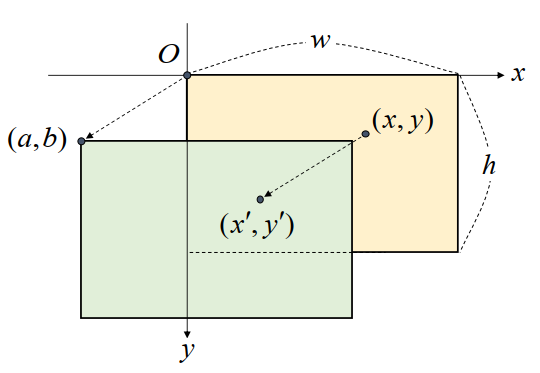

$$
\,각\,좌표들을 (a,b)\,만큼\,더한다.
\large{
    \begin{cases}
    x'=x+a\\
    y'= y+b
    \end{cases}
}
$$

<hr>
$$
행렬곱으로\,표현\\
\large{
    \begin{bmatrix}
    x'\\
    y'
    \end{bmatrix}=
    \begin{bmatrix}
    1 & 0 & a \\
    0 & 1 & b
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
    x\\y\\1
    \end{bmatrix}
}\\
이동을 위한 2\times3\,어파인\,변환\,행렬 \\
\begin{bmatrix}
1 & 0 & a \\
0 & 1 & b
\end{bmatrix}
$$



> **affine(아핀) 변환**: 영상을 구성하는 픽셀의 배치 구조를 변경함으로써 평행 이동, 확대 및 축소, 회전 등 전체 영상의 모양을 바꾸는 기하학적 변환

In [22]:
a = np.array([[1, 0, 5], [0, 1, 3]])
b = np.array([[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2], [1, 1, 1, 1, 1, 1]])  # 픽셀값들
a @ b

array([[5, 5, 5, 6, 6, 6],
       [3, 4, 5, 3, 4, 5]])

In [23]:
b

array([[0, 0, 0, 1, 1, 1],
       [0, 1, 2, 0, 1, 2],
       [1, 1, 1, 1, 1, 1]])

- cv2.warpAffine(src, M, dsize, dst=None, flags=None, borderMode=None, borderValue=None)
    - 매개변수
        - src: 원본 영상
        - M: $2\times3$ 어파인 변환 행렬. 실수형
        - dsize: 결과 영상의 크기를 (w, h) 튜플로 지정. (0,0) 이면 같은 크기
        - flags: 보간법
        - borderMode: 영상이 이동해서 생기는 빈공간을 채우는 방식 설정. default: cv2.BORDER_CONSTANT (검정색으로 채운다.)
            - borderValue: cv2.BORDER_CONSTANT 일때 채울 색. (B, G, R) 로 지정

In [25]:
import numpy as np
import cv2

lenna = cv2.imread('images/Lenna.png')
a, b = 200, 0  #a: 좌(음수)우(양수), b: 상(음수)하(양수)  이동 픽셀크기.
a, b = 0, -100
a, b = 100, 200

# 아핀변환행렬 (2, 3)
aff_matrix = np.array([[1, 0, a], [0, 1, b]], dtype="float32")

# 대상이미지, affine변환행렬, dsize(w, h) => 변환후 이미지 크기를 변환.
# result_img = cv2.warpAffine(lenna, aff_matrix, (0, 0))
# result_img = cv2.warpAffine(lenna, aff_matrix,  (lenna.shape[1]+a, lenna.shape[0]+b))# (1000, 1000))
result_img = cv2.warpAffine(lenna, aff_matrix, (0, 0), 
                            borderMode=cv2.BORDER_REFLECT  # 생기는 빈공간을 어떦값을 채울지
                           )

cv2.imshow("src", lenna)
cv2.imshow(f"Move - ({a}, {b})", result_img)
cv2.waitKey()
cv2.destroyAllWindows()

### 전단 변환(Shear transformation)
- 직사각형 형태의 영상을 한쪽 방향으로 밀어서 평행사변형 모양으로 변형되는 변환으로 층밀림 변환이라고도 한다.
    - 한축 방향으로 이동하는데 기준축에 비례해서 다르게 이동한다.
- X축과 Y축에 대해 따로 정의 한다.
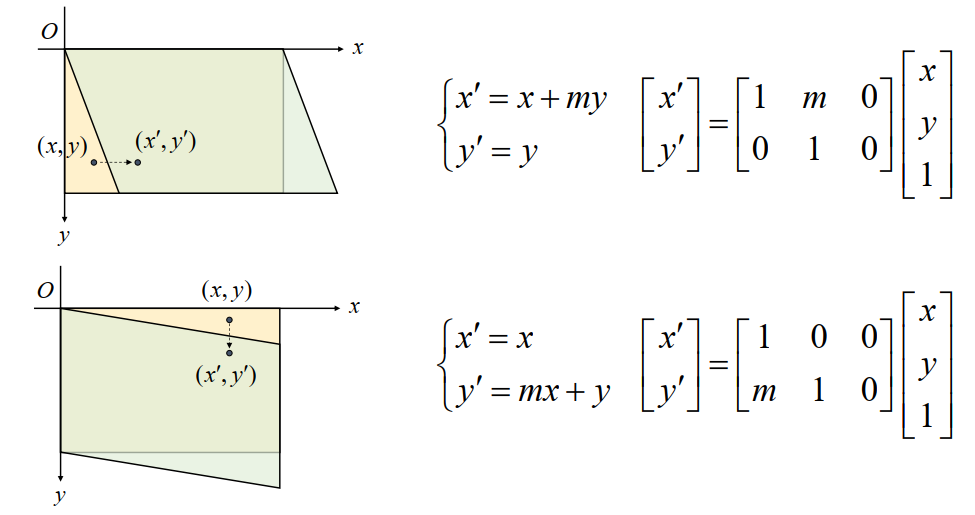
<center>m: 비율</center>

In [26]:
m_x, m_y = 0.1, 0.1
shear_matrix = np.array([[1, m_x, 0], [m_y, 1, 0]], dtype="float32")

result2 = cv2.warpAffine(lenna, shear_matrix, (0, 0))
cv2.imshow("src", lenna)
cv2.imshow(f"({m_x}, {m_y})", result2)
cv2.waitKey()
cv2.destroyAllWindows()

### 대칭변환(Flip)
- cv2.flip(src, flipCode)
- 매개변수
    - src: 원본 영상
    - flipCode: 대칭방향지정
        - 양수: 좌우대칭
        - 0: 상하대칭
        - 음수: 좌우/상하 대칭


In [28]:
result1 = cv2.flip(lenna, 1)
result2 = cv2.flip(lenna, 0)
result3 = cv2.flip(lenna, -1)

cv2.imshow("src", lenna)
cv2.imshow("1", result1)
cv2.imshow("0", result2)
cv2.imshow("-1", result3)

cv2.waitKey()
cv2.destroyAllWindows()

## 회전(Rotate)
- **rotate(src, rotateCode): img**
    - 매개변수
        - src: 회전시킬 원본이미지
        - rotateCode: 회전각도 상수
            - **ROTATE_90_CLOCKWISE**: 시계방향 90도
            - **ROTATE_180**: 180도 회전
            - **ROTATE_90_COUNTERCLOCKWISE**: 반시계방향 90도(시계방향 270도)
- 원하는 각도만큼 회전.
    - 얼마나 회전할지 getRotationMatrix2D()를 이용해 어파인 변환 행렬을 생성.
    - **warpAffine()**을 이용해 회전 처리
    - **getRotationMatrix2D(center, angle, scale)**
        - 2x3의 회전을 위한 어파인 변환 행렬 생성
        - center: 회전의 중심점 좌표, 튜플형태로 지정
        - angle: 중심점을 기준으로 회전할 각도(양수: 반시계방향, 음수: 시계방향)
        - scale: 이미지 확대 및 축소 비율
    - **warpAffine(src, M, dsize)**
        - 회전 처리
        - src: 회전시킬 대상 이미지 배열.
        - M:  getRotationMatrix2D()가 반환한 어파인 변환 행렬을 사용
        - dsize: 출력이미지 크기  
            - (0,0): 변환된 크기 유지

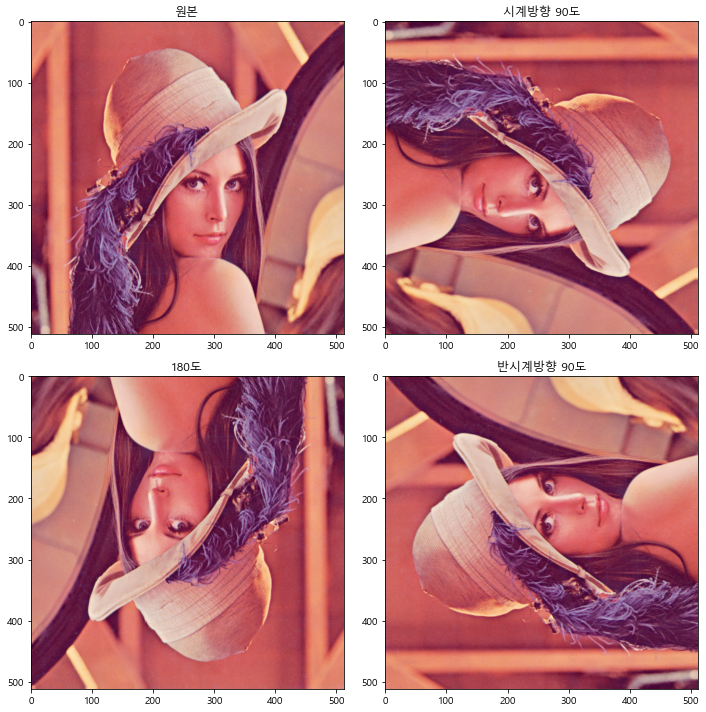

In [29]:
import cv2
import matplotlib.pyplot as plt

# rotate() : 가운데를 기준으로 90도 단위로 회전.
lenna = cv2.imread('images/Lenna.png')
lenna_90 = cv2.rotate(lenna, cv2.ROTATE_90_CLOCKWISE)
lenna_180 = cv2.rotate(lenna, cv2.ROTATE_180)
lenna_270 = cv2.rotate(lenna, cv2.ROTATE_90_COUNTERCLOCKWISE)

images = [lenna, lenna_90, lenna_180, lenna_270]
titles = ["원본", "시계방향 90도", "180도", "반시계방향 90도"]

plt.figure(figsize=(10, 10))
for idx, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(2, 2, idx+1)
    plt.imshow(image[:, :, ::-1])
    plt.title(title)

plt.tight_layout()
plt.show()

[[  0.39931776  -0.30090751 230.80697768]
 [  0.30090751   0.39931776  76.74233175]]


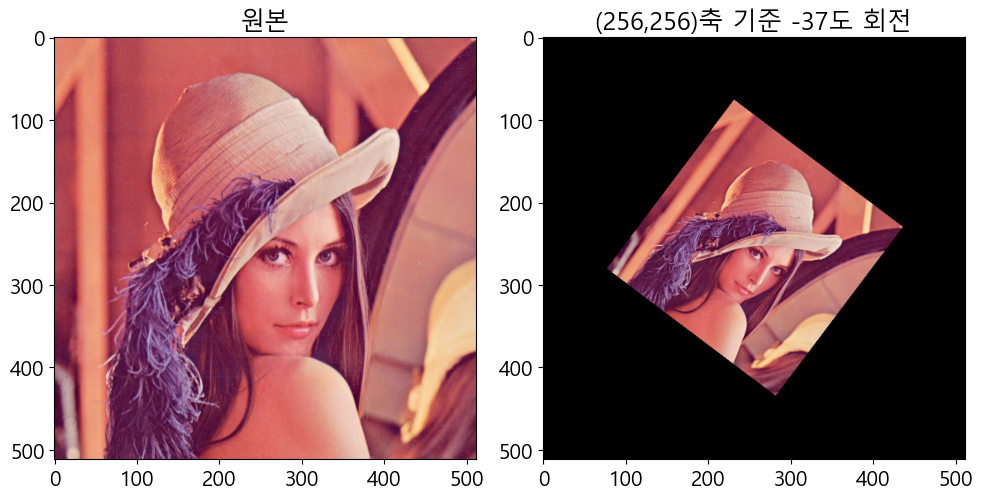

In [50]:
### 원하는 각도만큼 회전
angle = -37  # 회전시킬 각도 - 양수: 반시계방향, 음수: 시계방향
# center x, y좌표
x, y = int(lenna.shape[1]/2), int(lenna.shape[0]/2)
center = (x, y)  # 돌릴 기준 좌표
# center = (10, 10)

# affine 변환행렬을 생성
rotate_matrix = cv2.getRotationMatrix2D(center, # 회전축의 기준좌표
                                        angle, #회전각도
                                        0.5      # 회전후 이미지 크기. 비율 (1-원본과 동일)
                                       )
print(rotate_matrix)
rotate_result = cv2.warpAffine(lenna, rotate_matrix, (0, 0))

images = [lenna, rotate_result]
titles = ["원본", f"({x},{y})축 기준 {angle}도 회전"]

plt.figure(figsize=(10, 5))
for idx, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1, 2, idx+1)
    plt.imshow(image[:,:,::-1])
    plt.title(title)
    
plt.tight_layout()
plt.show()

In [44]:
lenna.shape

(512, 512, 3)

## 크기 조절(확대/축소 - Resize)
- cv2.resize(src, dsize\[, fx, fy, interpolation\])
    - 매개변수
        - src: 원본 이미지 
        - dsize: 조절할 이미지 크기 (width, height)
        - fx, fy: 상대적 크기로 지정한다. (dsize는 0,0 으로 설정한다. dsize를 설정하면 dsize가 우선한다.)
        - interpolation: 보간 방법
             - 크기를 조절할 때 본래는 없는 값을 메우는 작업이 필요한데, 이를 interpolation(보간법)이라고 한다.
    - 반환값
        - ndarray: resize된 이미지반환
        
### Interpolation 상수
- cv2.INTER_NEAREST: 이웃보간법. nearest neighbor interpolation이라고도 하며, 주변 이웃 pixel값을 가져와 빈공간을 채운다. 가장 빠르지만 화질이 좋지 않다.
- cv2.INTER_LINEAR: 쌍 선형보간법.(2x2 이웃픽셀을 계산해서 만든다.) resize의 default 방식. 연산속도가 빠르고 화질도 좋아서 많이 사용된다.
- cv2.INTER_CUBIC - 바이큐빅 보간법.(4x4 이웃픽셀을 계산해서 만든다.)  INTER_LINEAR보다 화질이 좋고 lancozs보다 계산량이 적어 많이 사용된다.
- cv2.LANCZOS4 - Lanczos보간법.(8x8 이웃픽셀을 계산해서 만든다.) 가장 부드럽게 값을 메우지만 연산이 많이 필요하다.
- cv2.INTER_AREA: 영역보간법. 크기를 **축소**할 때 많이 사용한다. 확대할 때는 nearest neighbor와 유사하다.
- 일반적으로 쌍 선형보간법(INTER_LINEAR)을 많이 쓴다.
    - 이미지 확대: 바이큐빅, 쌍 선형 보간법을 가장 많이 사용
    - 이미지 축소: 영역 보간법을 많이 사용.
    
### Interpolation 비교
- **upsampling**
    - nearest와 area는 계단현상이 발생
    - linear는 edge가 smooth된 효과가 발생
    - cubic과 lancozs는 edge가 shapen되는 효과
- **downsampling**
    - area는 pixel 관계에 따라 resampling하기 때문에 상대적으로 부드럽게 변환된다.
    - 나머지는 계단현상이 많이 발생한다.

- upsampling: cv2.INTER_CUBIC 또는 cv2.INTER_LINEAR
- downsampling: cv2.INTER_AREA

In [30]:
rose = cv2.imread('images/rose.bmp')
rose.shape

(320, 480, 3)

In [32]:
# 크기를 지정해서 resize  (240:width, 160:height)
result1 = cv2.resize(rose, (240, 160),
                    interpolation=cv2.INTER_AREA
                    ) #(160, 240)

cv2.imshow("src", rose)
cv2.imshow("160 x 240", result1)

cv2.waitKey()
cv2.destroyAllWindows()

In [33]:
# 비율로 크기를 지정 resize
result2 = cv2.resize(rose, (0, 0), 
                     fx=4, # 가로 -> 4배
                     fy=4  # 높이 -> 4배
                    ,interpolation=cv2.INTER_NEAREST)

result3 = cv2.resize(rose, (0, 0), 
                     fx=4, 
                     fy=4  
                     , interpolation=cv2.INTER_LINEAR  # default: LINEAR
                    )

result4 = cv2.resize(rose, (0, 0), 
                     fx=4, 
                     fy=4  
                     , interpolation=cv2.INTER_CUBIC
                    )
result5 = cv2.resize(rose, (0, 0), 
                     fx=4, 
                     fy=4  
                     , interpolation=cv2.INTER_LANCZOS4
                    )

# cv2.imshow("src", rose)
# cv2.imshow("2배", result2)

# cv2.waitKey()
# cv2.destroyAllWindows()

In [34]:
result3.shape

(1280, 1920, 3)

In [35]:
cv2.imshow("src", rose)
cv2.imshow("Nearest", result2[500:900, 400:800])
cv2.imshow("LINEAR", result3[500:900, 400:800])
cv2.imshow("CUBIC", result4[500:900, 400:800])
cv2.imshow("LANCZOS4", result5[500:900, 400:800])

cv2.waitKey()
cv2.destroyAllWindows()